In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
pwd

'/mnt/c/Users/okpl8/documents/project1/figure/src/random_forest'

In [3]:
cd ../

/mnt/c/Users/okpl8/documents/project1/figure/src


In [4]:
cd ../

/mnt/c/Users/okpl8/documents/project1/figure


In [5]:
data = pd.read_csv('./data/merged.csv')
data.head()

,image_filename,Nose_x,Nose_y,LEye_x,LEye_y,REye_x,REye_y,LEar_x,LEar_y,REar_x,...,LSmallToe_y,RSmallToe_x,RSmallToe_y,LHeel_x,LHeel_y,RHeel_x,RHeel_y,gender,level,label
0,65.jpg,1903.450439,324.195709,1896.498169,317.243469,1896.498169,317.243469,1908.085205,326.513123,1908.085205,...,433.114258,1877.958862,426.162018,1903.450439,435.431671,1905.767822,433.114258,0,3,Jump
1,66.jpg,1902.256348,330.161255,1902.256348,325.993469,1908.508057,332.245117,1906.424072,328.077362,1916.843506,...,431.238159,1873.883179,425.009338,1902.474854,432.223877,1903.593750,432.438110,0,3,Jump
2,67.jpg,1899.319946,328.725464,1917.416260,300.575562,1917.416260,298.564880,1901.330566,328.725464,1920.000000,...,430.018127,1871.919434,423.960632,1898.995605,432.955017,1902.013794,431.365784,0,3,Jump
3,68.jpg,1914.982666,298.280396,1916.995972,296.267059,1914.982666,296.267059,1916.995972,296.267059,1920.000000,...,430.558533,1870.586792,422.695221,1896.009155,431.532043,1900.942139,428.800903,0,3,Jump
4,69.jpg,1914.923340,295.087738,1910.812134,295.087738,1912.867676,295.087738,1914.923340,293.032135,1920.000000,...,429.011780,1867.699951,422.027954,1894.613647,431.073181,1906.373169,428.228760,0,3,Jump


In [6]:
data = data.drop('image_filename', axis=1)
data.head()

,Nose_x,Nose_y,LEye_x,LEye_y,REye_x,REye_y,LEar_x,LEar_y,REar_x,REar_y,...,LSmallToe_y,RSmallToe_x,RSmallToe_y,LHeel_x,LHeel_y,RHeel_x,RHeel_y,gender,level,label
0,1903.450439,324.195709,1896.498169,317.243469,1896.498169,317.243469,1908.085205,326.513123,1908.085205,324.195709,...,433.114258,1877.958862,426.162018,1903.450439,435.431671,1905.767822,433.114258,0,3,Jump
1,1902.256348,330.161255,1902.256348,325.993469,1908.508057,332.245117,1906.424072,328.077362,1916.843506,311.406311,...,431.238159,1873.883179,425.009338,1902.474854,432.223877,1903.593750,432.438110,0,3,Jump
2,1899.319946,328.725464,1917.416260,300.575562,1917.416260,298.564880,1901.330566,328.725464,1920.000000,298.564880,...,430.018127,1871.919434,423.960632,1898.995605,432.955017,1902.013794,431.365784,0,3,Jump
3,1914.982666,298.280396,1916.995972,296.267059,1914.982666,296.267059,1916.995972,296.267059,1920.000000,298.280396,...,430.558533,1870.586792,422.695221,1896.009155,431.532043,1900.942139,428.800903,0,3,Jump
4,1914.923340,295.087738,1910.812134,295.087738,1912.867676,295.087738,1914.923340,293.032135,1920.000000,295.087738,...,429.011780,1867.699951,422.027954,1894.613647,431.073181,1906.373169,428.228760,0,3,Jump


In [7]:
df = data

In [8]:
X = data.drop(['label', 'level','gender'] , axis=1)
Y = data['label']

print(X.shape)
print(Y.shape)

(531740, 52)
(531740,)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42, stratify=Y
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(425392, 52)
(106348, 52)
(425392,)
(106348,)


In [10]:
model = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

In [13]:
fold = KFold(n_splits=5, shuffle=False)
cv_scores = cross_val_score(model, X_train, Y_train, cv=fold, scoring='accuracy')
print("\n=== Cross-validation Scores ===")
print(f"CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# 5. 최종 모델 훈련
print("\n=== Training Final Model ===")
model.fit(X_train, Y_train)
print("Model training completed!")

# 6. 훈련 세트 성능 평가
Y_train_pred = model.predict(X_train)
print("\n=== Training Set Performance ===")
print(classification_report(Y_train, Y_train_pred))

# 7. 테스트 세트 성능 평가
Y_test_pred = model.predict(X_test)
Y_test_pred_proba = model.predict_proba(X_test)
print("\n=== Test Set Performance ===")
print(classification_report(Y_test, Y_test_pred))


=== Cross-validation Scores ===
CV Accuracy: 0.940 (+/- 0.002)

=== Training Final Model ===
Model training completed!

=== Training Set Performance ===
              precision    recall  f1-score   support

        Jump       1.00      1.00      1.00    176863
        Spin       1.00      1.00      1.00    144415
        Step       1.00      1.00      1.00    104114

    accuracy                           1.00    425392
   macro avg       1.00      1.00      1.00    425392
weighted avg       1.00      1.00      1.00    425392


=== Test Set Performance ===
              precision    recall  f1-score   support

        Jump       0.95      0.96      0.95     44216
        Spin       0.95      0.94      0.94     36104
        Step       0.95      0.95      0.95     26028

    accuracy                           0.95    106348
   macro avg       0.95      0.95      0.95    106348
weighted avg       0.95      0.95      0.95    106348



In [11]:
d

NameError: name 'd' is not defined

Classification Report:
              precision    recall  f1-score   support

        Jump       0.95      0.96      0.95     44216
        Spin       0.95      0.94      0.95     36104
        Step       0.95      0.96      0.96     26028

    accuracy                           0.95    106348
   macro avg       0.95      0.95      0.95    106348
weighted avg       0.95      0.95      0.95    106348



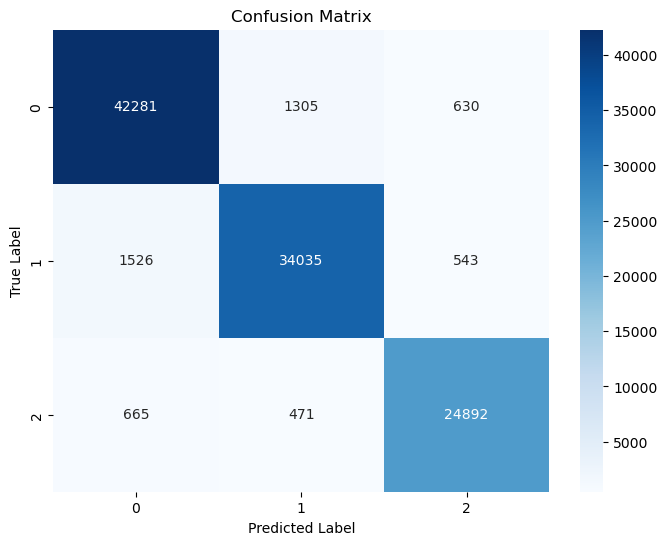

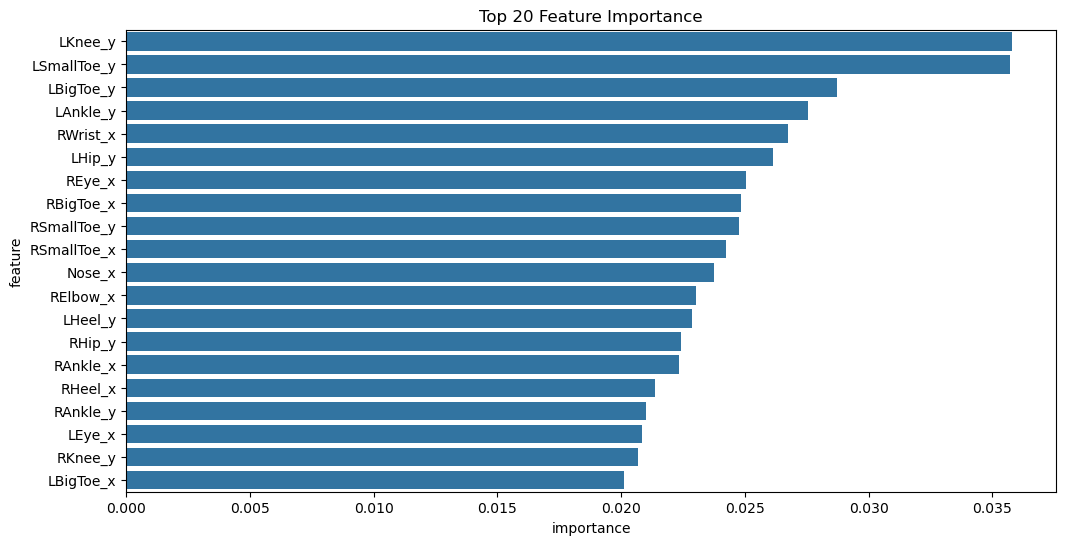


Top 20 Important Features:
        feature  importance
27      LKnee_y    0.035787
45  LSmallToe_y    0.035699
41    LBigToe_y    0.028736
31     LAnkle_y    0.027535
20     RWrist_x    0.026738
23       LHip_y    0.026138
4        REye_x    0.025027
42    RBigToe_x    0.024852
47  RSmallToe_y    0.024744
46  RSmallToe_x    0.024233
0        Nose_x    0.023755
16     RElbow_x    0.023006
49      LHeel_y    0.022846
25       RHip_y    0.022429
32     RAnkle_x    0.022328
50      RHeel_x    0.021383
33     RAnkle_y    0.020997
2        LEye_x    0.020855
29      RKnee_y    0.020690
40    LBigToe_x    0.020126


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 분리
X = data.drop(['label', 'level', 'gender'], axis=1)  # 특성
y = data['label']  # 타겟 (Jump, Spin, Step)

# train, test 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# 2. 모델 학습
rf_model = RandomForestClassifier(n_estimators=100,  # 트리 개수
                                random_state=42,
                                n_jobs=-1)  # 모든 CPU 사용
rf_model.fit(X_train, y_train)

# 3. 예측
y_pred = rf_model.predict(X_test)

# 4. 성능 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 6. 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance')
plt.show()

# 7. 상위 20개 중요 특성 출력
print("\nTop 20 Important Features:")
print(feature_importance.head(20))